# Problem 1

## (a)

Substituting $ \mathbf{h}_1 = \mathbf{W}_x \mathbf{x}_1 $:
   $$
   \mathbf{h}_2 = \mathbf{W}_h \mathbf{h}_1 + \mathbf{W}_x \mathbf{x}_2
   $$

   $$
   \mathbf{h}_2 = \mathbf{W}_h \mathbf{W}_x \mathbf{x}_1 + \mathbf{W}_x \mathbf{x}_2
   $$

Substituting $ \mathbf{h}_2 $:

   $$
   \mathbf{y}_2 = \phi_y(\mathbf{W}_y \mathbf{h}_2)
   $$

   $$
   \mathbf{y}_2 = \phi_y(\mathbf{W}_y \mathbf{W}_h \mathbf{W}_x \mathbf{x}_1 + \mathbf{W}_y \mathbf{W}_x \mathbf{x}_2)
   $$

## (b)

Substituting $ \mathbf{h}_2 = \mathbf{W}_h \mathbf{W}_x \mathbf{x}_1 + \mathbf{W}_x \mathbf{x}_2 $:

   $$
   \mathbf{h}_3 = \mathbf{W}_h \mathbf{h}_2 + \mathbf{W}_x \mathbf{x}_3
   $$

   $$
   \mathbf{h}_3 = \mathbf{W}_h (\mathbf{W}_h \mathbf{W}_x \mathbf{x}_1 + \mathbf{W}_x \mathbf{x}_2) + \mathbf{W}_x \mathbf{x}_3
   $$

   $$
   \mathbf{h}_3 = \mathbf{W}_h^2 \mathbf{W}_x \mathbf{x}_1 + \mathbf{W}_h \mathbf{W}_x \mathbf{x}_2 + \mathbf{W}_x \mathbf{x}_3
   $$

substituting $ \mathbf{h}_3 $:

   $$
   \mathbf{y}_3 = \phi_y(\mathbf{W}_y \mathbf{h}_3)
   $$

   $$
   \mathbf{y}_3 = \phi_y(\mathbf{W}_y \mathbf{W}_h^2 \mathbf{W}_x \mathbf{x}_1 + \mathbf{W}_y \mathbf{W}_h \mathbf{W}_x \mathbf{x}_2 + \mathbf{W}_y \mathbf{W}_x \mathbf{x}_3)
   $$

## (C)

 $$ \mathbf{h}_T = \mathbf{W}_h \mathbf{h}_{T-1} + \mathbf{W}_x \mathbf{x}_T$$
 By recursively substituting $ \mathbf{h}_{T-1}, \mathbf{h}_{T-2}, \dots, \mathbf{h}_1 $, we get:

  $$
  \mathbf{h}_T = \mathbf{W}_h^{T-1} \mathbf{W}_x \mathbf{x}_1 + \mathbf{W}_h^{T-2} \mathbf{W}_x \mathbf{x}_2 + \dots + \mathbf{W}_h \mathbf{W}_x \mathbf{x}_{T-1} + \mathbf{W}_x \mathbf{x}_T
  $$
 $$
   \mathbf{h}_T = \sum_{i=1}^{T} \mathbf{W}_h^{T-i} \mathbf{W}_x \mathbf{x}_i
   $$

  $$
   \mathbf{y}_T = \phi_y\left(\mathbf{W}_y \sum_{i=1}^{T} \mathbf{W}_h^{T-i} \mathbf{W}_x \mathbf{x}_i\right)
   $$

## (d)

In an RNN, the contribution of the first input $\mathbf{x}_1 $ to the hidden state $ \mathbf{h}_T $ and the output $ \mathbf{y}_T $ is given by:

$$
\mathbf{h}_T = \sum_{i=1}^{T} \mathbf{W}_h^{T-i} \mathbf{W}_x \mathbf{x}_i
$$

For the first input $ \mathbf{x}_1 $, its contribution to $ \mathbf{h}_T $ is:

$$
\mathbf{W}_h^{T-1} \mathbf{W}_x \mathbf{x}_1
$$

If we decompose the matrix $ \mathbf{W}_h $ using its eigenvalues and eigenvectors, we have:

$$
\mathbf{W}_h = \mathbf{P} \mathbf{\Lambda} \mathbf{P}^{-1}
$$

where $ \mathbf{\Lambda} $ is the diagonal matrix containing the eigenvalues $ \lambda_1, \lambda_2, \dots, \lambda_n $ of $ \mathbf{W}_h $. Hence, the expression for $ \mathbf{W}_h^{T-1} $ becomes:

$$
\mathbf{W}_h^{T-1} = \mathbf{P} \mathbf{\Lambda}^{T-1} \mathbf{P}^{-1}
$$

In $ \mathbf{\Lambda}^{T-1} $, the eigenvalues are raised to the power of $ T-1 $, i.e.,

$$
\mathbf{\Lambda}^{T-1} = \text{diag}(\lambda_1^{T-1}, \lambda_2^{T-1}, \dots, \lambda_n^{T-1})
$$

If the eigenvalues $ \lambda_i $ of $ \mathbf{W}_h$ are less than 1 (which is often the case for neural network parameters), then as $ T $ increases, $ \lambda_i^{T-1} $ tends to 0. Thus, the contribution of the first input $ \mathbf{x}_1 $ to $ \mathbf{h}_T $ and $ \mathbf{y}_T $ diminishes exponentially with $ T $.

## (e)

**RNN**


$$ \mathbf{h}_T = \mathbf{W}_h \mathbf{h}_{T-1} + \mathbf{W}_x \mathbf{x}_T$$

At each timestep, the computation only involves $\mathbf{h}_{T-1}$  and $\mathbf{x}_T$, takes $O(1)$

There are $T$ steps in total, so the computation cost is linear to $T$ : $O(T)$


**Self-attention Layer**

Pair-wise inner product takes the dot product between query and key -- 
$
O(T^2 d)
$

Softmax over the square matrix -- $O(T^2)$

Matrix Multiplication of $\mathbf{A}$ and $\mathbf{V}$  -- $O(T^2)$

The total cost is $O(T^2)$



**RNN VS Transformer**

With sufficient parallel hardware, a forward pass on a transformer will generally be faster than on an RNN.  Although transformers have a higher memory and time complexity than RNN, but transformers can be fully parallelized across all tokens, order information is maintained by positional encoding while RNNs must process sequentially, waiting for each hidden state to be calculated before moving to the next. This makes transformers more efficient on parallel hardware.

## (f)

If memory constraints are manageable, I would choose a transformer, as RNNs suffer from vanishing gradient problems and cannot be parallelized effectively. Transformers handle long-range dependencies better and can fully utilize parallel hardware for long sequences.

# Problem 2

## (d)
To adapt transformers for continuous inputs like audio and images, the data can be divided into patches or frames, which act as "tokens." These tokens are flattened and projected into embeddings, with positional encodings added to retain order. This allows transformers to capture both local and global relationships through self-attention, similar to how they handle discrete token sequences.

# Problem 3

## (b)
To handle arbitrarily long inputs, we can use sinusoidal positional encodings such as SIREN instead of learned embeddings. Sinusoidal functions are periodic and continuous, allowing them to generate unique positional values for any token position without needing a fixed embedding table. This ensures that the model can encode positions for sequences of any length, as the functions can always compute a position, avoiding the limitations of predefined positional embeddings.

## (c)
Train Epoch: 9, Loss: 0.4039117162513733, Acc: 0.875360000038147

Val Epoch: 9, Loss: 1.3148666219711305, Acc: 0.5961

## (d)

The Attention Heatmaps

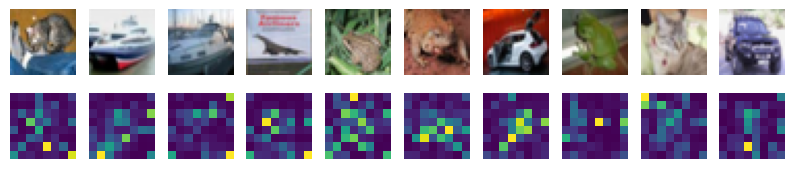

**Observation**

The attention heatmaps are visualizing how the class token (averaged over all heads and layers) is attending to different patches of the image. Since the class token is used to aggregate information for classification, the highlighted patches in the heatmap indicate the regions the model is focusing on to make its decision.

In the heatmaps, attention is concentrated on specific patches for most images, meaning that the model focuses only on certain parts of the image for classification. In the second image of a ship, the highlighted area in the attention heatmap roughly correspond to the main body of the ship.This suggests the model is learning to focus on meaningful parts of the image for classification.

The attention patterns vary across images, meaning the model adjusts its attention depending on the content of the image. For instance, images with larger or more complex subjects might have a more spread-out attention, while images with smaller or simpler subjects may have a more concentrated attention.

## (e)
- CNNs, with their inductive biases for translation invariance, perform well on small datasets by efficiently learning local patterns with fewer data. In contrast, ViTs rely on global attention without these biases, making them more flexible but data-hungry. ViTs typically require larger datasets or extensive pretraining to learn meaningful patterns due to their lack of built-in biases.


- CNNs inherently capture spatial hierarchies through convolutional layers, allowing them to handle varying image sizes by down-sampling and preserving local patterns. ViTs, on the other hand, depend on fixed patch sizes and positional encodings, which makes them less adaptable to images of different sizes unless explicitly designed to adjust positional encodings like using periodical functions as discussed in former question.

# Problem 4

## (e)

Because autoregressive generation is sequential, predicting one token at a time where each step depends on the previous one, making it hard to parallelize. In contrast, training processes all tokens in parallel, allowing for faster computation by fully utilizing the GPU.

## (f)

In the early epochs, the generated text tends to be repetitive, with outputs like "I, I, I, I" due to the model's initial reliance on simple patterns. As training progresses, the model learns better language structure, reducing repetition and producing more meaningful, contextually relevant sentences.

## (g)

```<START> KING RICHARD III : Why , I have a man ? I have not a word ? what is a man ? I will I am a man ? I am I will be a man . I am a man ? What , I will not be a man```

## (h)

Greedy decoding always selects the token with the highest probability at each step, which can lead to degenerate sequences, particularly when the highest-probability tokens are repeated frequently.Nucleus sampling select tokens from a dynamically sized subset whose cumulative probability exceeds a threshold. This allows the model to consider more diverse but still likely tokens, breaking the repetitive patterns. The trade-off is that it introduces some randomness which may result in lower-quality outputs. Besides it can be slower compared to greedy decoding.

## (i)

KV caching technique speeds up generation by storing previously computed key-value pairs, so the model doesn’t have to recompute attention for all tokens each time a new token is generated. Instead, it only computes attention for the new token, reducing the computational complexity from quadratic to linear as sequences grow.